# Waterfall Plot

A waterfall plot shows the cumulative effect of sequentially introduced positive or negative values.

To use it, you need to import the 'bistro' module.

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.bistro import *


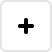
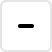
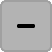
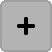
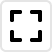
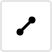
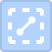
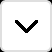
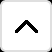
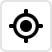
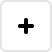
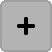
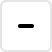
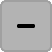
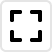
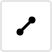
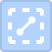
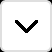
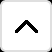
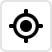

In [2]:
LetsPlot.setup_html()

In [3]:
data = {
    "Accounts": ["Product revenue", "Services revenue", "Fixed costs", "Variable costs"],
    "Values": [830_000, 290_000, -360_000, -150_000],
}

## Default View

In [4]:
waterfall_plot(data, "Accounts", "Values")

## Improved View

In [5]:
waterfall_plot(data, "Accounts", "Values", \
               size=.75, alpha=.15, width=.8, total_title="Profit", \
               hline=element_line(linetype='solid', size=1), \
               connector=element_line(linetype='dotted'), \
               label=element_text(size=10, family="Courier", face='bold', color='flow_type'), \
               label_format="$,.1~s") + \
    scale_y_continuous(name="Values", format="$,.1~s") + \
    ggtitle("Company Profit (in USD)") + \
    ggsize(1000, 500) + \
    theme_minimal() + \
    theme(plot_title=element_text(size=20, face='bold', hjust=.5))

## Additional Parameters

### `measure` and `group`

In [6]:
df = pd.DataFrame({
    "Company": ["Badgersoft"] * 7 + ["AIlien Co."] * 7,
    "Accounts": ["initial", "revenue", "costs", "Q1", "revenue", "costs", "Q2"] * 2,
    "Values": [200, 200, -100, None, 250, -100, None, \
               150, 50, -100, None, 100, -100, None],
    "Measure": ['absolute', 'relative', 'relative', 'total', 'relative', 'relative', 'total'] * 2,
})

waterfall_plot(df, "Accounts", "Values", measure="Measure", group="Company") + \
    facet_grid(x="Company", scales='free_x')

### `calc_total`

`calc_total=False` disables the calculation of the total if the measure isn't specified.

In [7]:
gggrid([
    waterfall_plot(data, "Accounts", "Values", calc_total=False),
    waterfall_plot(df[df["Company"] == "Badgersoft"], "Accounts", "Values", measure="Measure", calc_total=False),
])

### Tooltips

Tooltips for relative and absolute measures should be specified independently.

In [8]:
tooltips = layer_tooltips().title("Account: @xlabel")\
                           .format("@initial", " $,.3~s")\
                           .format("@value", " $,.3~s")\
                           .line("@{flow_type}d from @initial to @value")\
                           .disable_splitting()
absolute_tooltips = 'none'
waterfall_plot(data, "Accounts", "Values", tooltips=tooltips, absolute_tooltips=absolute_tooltips)

### `sorted_value`

In [9]:
waterfall_plot(data, "Accounts", "Values", sorted_value=True)

### `threshold`/`max_values`

In [10]:
gggrid([
    waterfall_plot(data, "Accounts", "Values") + ggtitle("Default"),
    waterfall_plot(data, "Accounts", "Values", threshold=300_000) + ggtitle("Specified threshold"),
    waterfall_plot(data, "Accounts", "Values", max_values=2) + ggtitle("Specified max_values"),
])